## 1. Radar data extraction

### Info extraction for each data collection trial

In [1]:
import os
import pandas as pd
from datetime import datetime, timedelta
import re

def extract_time(text):
    # Adjust the regex to match the full timestamp format
    match = re.search(r'\- (.*)', text)
    if match:
        return datetime.strptime(match.group(1), '%a %b %d %H:%M:%S %Y')
    else:
        return None

def trial_info_read(csv_file_path):

    df = pd.read_csv(csv_file_path, usecols=[0], dtype={0: str}, header=None)

    # Drop all rows where the first column is NaN
    df = df.dropna(subset=[0])
    df = df.dropna(how='all')

    # Extract capture start time
    capture_start_cell = df.loc[df[0].str.contains("Capture start time", na=False)].values[0]
    capture_start_time = extract_time(capture_start_cell[0])

    # Extract capture end time
    capture_end_cell = df.loc[df[0].str.contains("Capture end time", na=False)].values[0]
    capture_end_time = extract_time(capture_end_cell[0])

    # Extract duration
    duration_cell = df.loc[df[0].str.contains("Duration", na=False)].values[0]
    duration = int(re.search(r'\d+', duration_cell[0]).group())

    print(f"Capture Start Time: {capture_start_time}")
    print(f"Capture End Time: {capture_end_time}")
    print(f"Duration: {duration}")


    # Read only the third column (index 2) and skip rows with NaN in this column
    df2 = pd.read_csv(csv_file_path, usecols=[1],skip_blank_lines=False)
    df2_numeric = pd.to_numeric(df2.iloc[:, 0], errors='coerce')
    bin_file_count = df2_numeric.notna().sum()
    bin_file_count=int(bin_file_count)
    print(f"Number of data bin files: {bin_file_count}")

    return capture_start_time,capture_end_time,duration,bin_file_count


#example usage
csv_file_path = 'E:/RadarData/2243/male/2024-04-29/trial2_(periodicity=30ms)/adc_data_2024_04_29_Raw_LogFile.csv'
capture_start,capture_end,total_duration,bin_file_count=trial_info_read(csv_file_path)


Capture Start Time: 2024-04-30 00:00:18
Capture End Time: 2024-04-30 07:24:31
Duration: 26653
Number of data bin files: 15


### Generate csv file to record data bin info

In [ ]:
import os
import pandas as pd
from datetime import datetime, timedelta
import re

def get_file_size(file_path):
    """ Returns the file size in bytes. """
    if os.path.exists(file_path):
        return os.path.getsize(file_path)
    else:
        raise FileNotFoundError("File not found")


bin_file_directory = 'E:/RadarData/2243/female/2024-04-08'
# Dictionary to store the file sizes
file_sizes = {}
total_data_points = 0

for file_name in os.listdir(bin_file_directory):
    if file_name.endswith('.bin'):
        file_path = os.path.join(bin_file_directory, file_name)
        file_size = os.path.getsize(file_path)
        print(file_path,file_size)
        # Assuming each sample includes both real and imaginary parts, each 16 bits:
        data_points = file_size // (2 * 2 * 4)  # Calculate number of complex samples (16-bit real + 16-bit imaginary) for 4 Rx
        file_sizes[file_name] = {'file_size': file_size, 'data_points': data_points}
        total_data_points += data_points
print(file_sizes)

import re

# 使用正则表达式提取文件名中的数字
def extract_number(filename):
    match = re.search(r'Raw_(\d+)', filename)
    return int(match.group(1)) if match else -1

# 根据文件名中的数字对字典进行排序
sorted_data = dict(sorted(file_sizes.items(), key=lambda item: extract_number(item[0])))

# 打印排序后的字典
for key, value in sorted_data.items():
    print(f"{key}: {value}")



# Initialize a dictionary to hold the start and end times for each bin file
bin_files_time_info = {}

# Calculate the start and end times based on the proportion of data points
previous_end_time = capture_start

for file_name, info in file_sizes.items():
    data_points = info['data_points']
    file_duration = (data_points / total_data_points) * total_duration
    start_time = previous_end_time
    end_time = start_time + timedelta(seconds=file_duration)
    duration = end_time - start_time  # Calculate duration for each file
    file_name=str(os.path.join(bin_file_directory,file_name))
    bin_files_time_info[file_name] = {
        'start_time': start_time.strftime('%Y-%m-%d %H:%M:%S'),
        'end_time': end_time.strftime('%Y-%m-%d %H:%M:%S'),
        'duration_seconds': duration.total_seconds(),
        'data_points': data_points
    }
    previous_end_time = end_time  # update the previous end time to the current end time

# # Convert the time information dictionary to a DataFrame
# time_info_df = pd.DataFrame.from_dict(bin_files_time_info, orient='index')

# # Save the bin files time information to a new CSV file
# output_path='../2024-01-11/trial1/bin_files_time_info.csv'
# time_info_df.to_csv(output_path)
# print(output_path)


E:/RadarData/2243/female/2024-04-08\adc_data_2024_04_08_Raw_53.bin 1073741760
E:/RadarData/2243/female/2024-04-08\adc_data_2024_04_08_Raw_54.bin 1073741760
E:/RadarData/2243/female/2024-04-08\adc_data_2024_04_08_Raw_55.bin 1073741760
E:/RadarData/2243/female/2024-04-08\adc_data_2024_04_08_Raw_56.bin 1073741760
E:/RadarData/2243/female/2024-04-08\adc_data_2024_04_08_Raw_57.bin 1073741760
E:/RadarData/2243/female/2024-04-08\adc_data_2024_04_08_Raw_58.bin 1073741760
E:/RadarData/2243/female/2024-04-08\adc_data_2024_04_08_Raw_59.bin 1073741760
E:/RadarData/2243/female/2024-04-08\adc_data_2024_04_08_Raw_60.bin 1073741760
E:/RadarData/2243/female/2024-04-08\adc_data_2024_04_08_Raw_61.bin 1073741760
E:/RadarData/2243/female/2024-04-08\adc_data_2024_04_08_Raw_62.bin 1073741760
E:/RadarData/2243/female/2024-04-08\adc_data_2024_04_08_Raw_63.bin 1073741760
E:/RadarData/2243/female/2024-04-08\adc_data_2024_04_08_Raw_64.bin 1073741760
E:/RadarData/2243/female/2024-04-08\adc_data_2024_04_08_Raw_65.b

### Radar data segment waveform extraction

**Output data type**
1. Raw data
2. IQ data
3. Unwrapped data
4. Original multi-range bin data


**Target localization option**
1. Peak tracking (3D-FFT)
2. Peak tracking (2D-FFT)
3. One-time detection (locate target only using 1st frame the fix range bin)
4. ...

In [ ]:
import numpy as np
import os
import pandas as pd
import scipy
from datetime import datetime
from mmwave.dsp.cfar import ca
from mmwave.dsp.doppler_processing import doppler_processing,doppler_resolution
from mmwave.dsp.range_processing import range_processing,range_resolution
from mmwave.dsp.noise_removal import prune_to_peaks,range_based_pruning,peak_grouping_along_doppler
import matplotlib.pyplot as plt


class RadarDataProcessor:
    def __init__(self, radar_config, csv_path):
        self.config=radar_config    
        self.csv_path = csv_path
        self.bin_file_info = self.read_csv_info(csv_path)
        self.rangeMin=0.2 # m
        self.rangeMax=1.6 # m

    @staticmethod
    def readDCA1000(fileName):
        if not os.path.isfile(fileName):
            raise ValueError('File not found')
        numADCBits = 16 
        numLanes = 4     
        isReal = False 
        with open(fileName, 'rb') as fid:
            adcData = np.fromfile(fid, dtype=np.int16)
            if numADCBits != 16:
                l_max = 2**(numADCBits-1)-1
                adcData[adcData>l_max]=2**numADCBits
        if isReal:
            adcData = np.reshape(adcData, (numLanes, -1))
        else:
            adcData = np.reshape(adcData, (numLanes*2, -1))
            adcData = adcData[:numLanes, :]+1j*adcData[numLanes:, :]
        return adcData
        
    def read_csv_info(self, csv_path):
        # Read and process the CSV file to get metadata for each bin file
        df = pd.read_csv(csv_path)
        df['start_time'] = pd.to_datetime(df['start_time'])
        df['end_time'] = pd.to_datetime(df['end_time'])
        return df
    
    def find_relevant_bin(self, start_datetime, end_datetime):
        # Filter DataFrame to find the bin file that covers the requested time span
        relevant_bins = self.bin_file_info[
            (self.bin_file_info['start_time'] <= start_datetime) & 
            (self.bin_file_info['end_time'] >= end_datetime)]
        return relevant_bins
    
    def extract_data_by_timestamp(self, start_datetime, end_datetime):
        relevant_bin = self.find_relevant_bin(start_datetime, end_datetime)
        if relevant_bin.empty:
            raise ValueError("No bin file covers the provided time span")
        
        # Read the bin data from the relevant file
        bin_data = self.readDCA1000(relevant_bin.iloc[0,0])

        # Calculate indexes based on data points and timestamps
        total_seconds = (end_datetime - start_datetime).total_seconds()
        start_idx = int(((start_datetime - relevant_bin.iloc[0]['start_time']).total_seconds() / total_seconds) * relevant_bin.iloc[0]['data_points'])
        end_idx = int(((end_datetime - relevant_bin.iloc[0]['start_time']).total_seconds() / total_seconds) * relevant_bin.iloc[0]['data_points'])
        
        return bin_data[:, start_idx:end_idx]
    
    
    def target_detection_by_frame(self,rawDataCube, method='peak',rx=0):
        
        range_re,bandwidth=range_resolution(self.config['Nadc'], self.config['sample_rate'], self.config['slope'])
        
        # doppler_re=doppler_resolution(bandwidth, self.config['f0'], self.config['ramp_end_time'], 
        #                               self.config['idle_time'], self.config['Nchirp'], self.config['Tx'])
        
        rawDataCube=np.reshape(rawDataCube,(self.config['Tx']*self.config['Rx'],self.config['Nadc'],self.config['Nchirp'])) #(x,y,z)
        rawDataCube=np.transpose(rawDataCube, (2, 0, 1))  # (z, x, y)(128,4,256)
        range_FFT=range_processing(rawDataCube)
        dopplermap, aoa_input=doppler_processing(range_FFT,clutter_removal_enabled=True,num_tx_antennas=1,accumulate=False)        

        if method == 'CFAR':
            detected_indices=ca(dopplermap, l_bound=10, guard_len=10, noise_len=8)
            target_candidates=np.abs(dopplermap)*detected_indices
            # ignore data out of range

            if self.rangeMin is not None and self.rangeMax is not None:
                target_candidates[:int(self.rangeMin/range_re),:] = 0  
                target_candidates[int(self.rangeMax/range_re):,:] = 0 
            peak = np.max(target_candidates)
            indices = np.where(dopplermap== peak)
            row=indices[0] 
            col=indices[1]

        elif method == 'peak':
            dopplermap=np.abs(dopplermap)
            if self.rangeMin is not None and self.rangeMax is not None:
                dopplermap[:int(self.rangeMin/range_re),:] = 0  
                dopplermap[int(self.rangeMax/range_re):,:] = 0  
            peak = np.max(dopplermap)
            indices = np.where(dopplermap== peak)
            row=indices[0] 
            col=indices[1]
        else:
            raise ValueError("Unsupported method")
        idata=rawDataCube[col,rx,row].real
        qdata=rawDataCube[col,rx,row].imag
        return idata, qdata, [col, row]
        
    
    def target_detection(self, raw_data, method='peak', tracking=False):
        """
        Apply target detection algorithms to radar data.
        
        Args:
        iq_data (numpy.ndarray): The IQ data array from radar.
        method (str): The detection method to use ('CFAR', 'peak').
        
        Returns:
        targets (numpy.ndarray): Detected targets' information.
        """
        # Trimming the data in order to keep only the complete frame
        Nframe = int(np.floor(raw_data.shape[1] / (self.config['Nadc'] * self.config['Nchirp'])))
        NDataPoints = Nframe * self.config['Nadc'] * self.config['Nchirp']
        trimmed_rawData = raw_data[:, :NDataPoints]
        # rawData_reshaped = np.reshape(trimmed_rawData, (self.config['Rx']*self.config['Tx'], self.config['Nadc'],-1))
        Idata=np.array([])
        Qdata=np.array([])
        if tracking:
            for i in range(0,Nframe):
                cdata = trimmed_rawData[:,  i*self.config['Nchirp']*self.config['Nadc']:(i+1)*self.config['Nchirp']*self.config['Nadc']].flatten()
                i_data,q_data,_=self.target_detection_by_frame(cdata,method)
                Idata=np.append(Idata,i_data)
                Qdata=np.append(Qdata,q_data)
        else:
            cdata = trimmed_rawData[:,  :self.config['Nchirp']*self.config['Nadc']].flatten() #only 1st frame
            i_data,q_data,idx=self.target_detection_by_frame(cdata,method)
            Idata=np.append(Idata,i_data)
            Qdata=np.append(Qdata,q_data)
            for i in range(1,Nframe): 
                cdata = trimmed_rawData[:, i*self.config['Nchirp']*self.config['Nadc']:(i+1)*self.config['Nchirp']*self.config['Nadc']].flatten()
                rawDataCube=np.reshape(cdata,(self.config['Tx']*self.config['Rx'],self.config['Nadc'],self.config['Nchirp'])) #(x,y,z)
                rawDataCube=np.transpose(rawDataCube, (2, 0, 1))  # (z, x, y)(128,4,256)
                Idata=np.append(Idata,rawDataCube[idx[0],0,idx[1]].real)
                Qdata=np.append(Qdata,rawDataCube[idx[0],0,idx[1]].imag)
        
        return Idata,Qdata


# Example usage:
Args = {
    'f0':77,                    # Hz
    'ADCStarttime': 6,    # us
    'slope': 29.982,            # MHz/us
    'idle_time': 100,       # us
    'ramp_end_time': 60,    # us
    'Nadc': 256,             # samples per chirp
    'sample_rate': 10000,    # samples per second (ksps)
    'Rx': 4,                      # Number of RX channels
    'Tx': 1,                      # Number of TX channels
    'Nchirp': 128,                # Number of chirps per frame
    'Period': 40            # ms
}# All transferred to s
output_path='../2024-01-11/trial1/bin_files_time_info.csv'
processor = RadarDataProcessor(Args,output_path)
start_time = datetime(2024, 1, 11, 14, 31, 55)
end_time = datetime(2024, 1, 11, 14, 32, 15)
radar_rawdata = processor.extract_data_by_timestamp(start_time, end_time)
print(radar_rawdata.shape)
Idata,Qdata=processor.target_detection(raw_data=radar_rawdata)
plt.subplot(211)
plt.plot(Idata)
plt.subplot(212)
plt.plot(Qdata)
plt.show()

In [ ]:

trimmed_rawData = radar_rawdata[:, :256*128]
# rawData_reshaped = np.reshape(trimmed_rawData, (self.config['Rx']*self.config['Tx'], self.config['Nadc'],-1))
cdata = trimmed_rawData.flatten()
rawDataCube=np.reshape(rawDataCube,(4,256,128)) #(x,y,z)
rawDataCube=np.transpose(rawDataCube, (2, 0, 1))  # (z, x, y)(128,4,256)
range_FFT=range_processing(rawDataCube)
dopplermap, aoa_input=doppler_processing(range_FFT,clutter_removal_enabled=True,num_tx_antennas=1,accumulate=False)      

[[77.94025549  0.          0.         ...  0.          0.
   0.        ]
 [66.24425318  0.          0.         ...  0.          0.
   0.        ]
 [67.21865026  0.          0.         ...  0.          0.
   0.        ]
 ...
 [63.65313156  0.          0.         ...  0.          0.
   0.        ]
 [63.99788181  0.          0.         ...  0.          0.
   0.        ]
 [64.49214701  0.          0.         ...  0.          0.
   0.        ]]


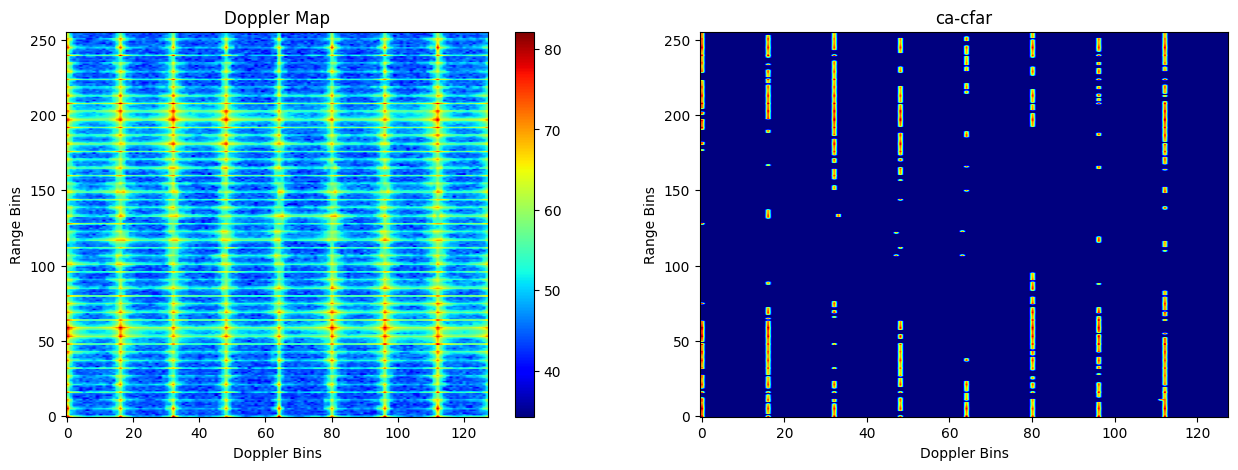

In [ ]:
import matplotlib.pyplot as plt

# Assuming dopplermap is a 2D numpy array with shape (range_bins, doppler_bins)
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(np.abs(dopplermap), aspect='auto', cmap='jet', origin='lower')
plt.colorbar()
plt.title('Doppler Map')
plt.xlabel('Doppler Bins')
plt.ylabel('Range Bins')

plt.subplot(122)
detected_indices=ca(dopplermap, l_bound=10, guard_len=10, noise_len=8)
print(np.abs(dopplermap)*detected_indices)
plt.imshow(np.abs(dopplermap)*detected_indices, aspect='auto', cmap='jet', origin='lower')
plt.title('ca-cfar')
plt.xlabel('Doppler Bins')
plt.ylabel('Range Bins')
plt.show()

In [ ]:

from mmwave.dsp.doppler_processing import doppler_resolution


range_re,bandwidth=range_resolution(Args['Nadc'], dig_out_sample_rate=10000, freq_slope_const=29.982)
doppler_re=doppler_resolution(bandwidth, start_freq_const=77, ramp_end_time=60, idle_time_const=100, num_loops_per_frame=128,
                       num_tx_antennas=1)

print(range_re,doppler_re)

0.19529455824536388 0.09458251833005336


## 2. PSG data extraction

### PSGDataProcessor implementation

In [28]:
import mne
import pyedflib
import numpy as np
import neurokit2 as nk
import matplotlib.pyplot as plt
from datetime import datetime

plt.rcParams['figure.figsize']=(12, 6)

class PSGDataProcessor:
    def __init__(self):
        """
        Initialize the PSGDataProcessor class without loading data immediately.
        """
        self.data = None
        self.raw_data = None
        self.sampling_rate = None
        self.ch_names = None
        self.start_datetime = None
    
    def load_data(self, psg_file):
        """
        Load PSG data from an EDF file.

        Args:
        psg_file (str): Path to the PSG file.
        """
        self.data = mne.io.read_raw_edf(psg_file, preload=False)
        self.raw_data = self.data.get_data()
        self.sampling_rate = self.data.info['sfreq']
        self.ch_names = self.data.ch_names
        self.start_datetime = self.get_datetime_from_info(self.data.info['meas_date'])
        
    def psg_plot(self):
        self.data.plot()
        
    def print_file_info(self, psg_file, info_name = 'file'):
        """
        Load PSG data from an EDF file using pyEDFlib and print file and signal headers.

        Args:
        psg_file (str): Path to the PSG file.
        """
        try:
            edf_file = pyedflib.EdfReader(psg_file)
            self.retrieve_info(edf_file, info_name)
            edf_file.close()
        except Exception as e:
            print(f"Failed to read EDF file: {e}")

    @staticmethod
    def retrieve_info(edf_file, info_name = 'file'):
        """
        Print detailed information about the EDF file.

        Args:
        edf_file (pyedflib.EdfReader): An instance of EdfReader.
        """
        if info_name == 'label':
            PSGDataProcessor.print_label_and_freq(list(zip(edf_file.getSignalLabels(), edf_file.getSampleFrequencies())))
        elif info_name == 'signal':
            PSGDataProcessor.print_sig_headers(edf_file.getSignalHeaders())
        else:
            PSGDataProcessor.print_file_header(edf_file.getHeader())


    @staticmethod
    def print_label_and_freq(sig_freq):
        """
        Print signal labels and their corresponding sampling frequencies.

        Args:
        sig_freq (list of tuples): List containing signal labels and frequencies.
        """
        print("Signal Labels | Sampling Frequencies")
        print("------------------------------------")
        for label, freq in sig_freq:
            print(f"{label} | {freq}")

    @staticmethod
    def print_sig_headers(signal_headers):
        """
        Print all headers for each signal.

        Args:
        signal_headers (list): List containing headers of each signal.
        """
        for i, header in enumerate(signal_headers):
            print(f"Signal {i+1}:")
            print("Field Name | Value")
            print("------------------")
            for field_name, value in header.items():
                print(f"{field_name} | {value}")
            print("\n")

    @staticmethod
    def print_file_header(file_header):
        """
        Print the main header of the EDF file.

        Args:
        file_header (dict): Header information of the EDF file.
        """
        print("Field Name | Value")
        print("------------------")
        for field_name, value in file_header.items():
            print(f"{field_name} | {value}")
    
    def get_datetime_from_info(self, meas_date):
        """
        Convert measurement date to datetime object, handling various formats.

        Args:
        meas_date (tuple or datetime): The measurement date from MNE info.

        Returns:
        datetime: A datetime object.
        """
        if isinstance(meas_date, tuple):
            return datetime.fromtimestamp(meas_date[0]).replace(tzinfo=None)
        return meas_date.replace(tzinfo=None)
    
    def extract_segment_by_timestamp(self, start_datetime, end_datetime, data_types):
        """
        Extract specific types of data within a specified time range defined by timestamps.
        
        Args:
        start_datetime (datetime): Start datetime object.
        end_datetime (datetime): End datetime object.
        data_types (list): List of data types to extract, e.g., ['ECG', 'EEG'].
        
        Returns:
        dict: Dictionary of extracted data arrays keyed by type.
        """
        start_idx = int((start_datetime - self.start_datetime).total_seconds() * self.sampling_rate)
        end_idx = int((end_datetime - self.start_datetime).total_seconds() * self.sampling_rate)
        
        return self.extract_data_indices(start_idx, end_idx, data_types)

    def extract_data_indices(self, start_idx, end_idx, data_types):
        """
        Extract specific types of data within a specified index range.
        
        Args:
        start_idx (int): Start index.
        end_idx (int): End index.
        data_types (list): List of data types to extract, e.g., ['ECG', 'EEG'].
        
        Returns:
        dict: Dictionary of extracted data arrays keyed by type.
        """
        extracted_data = {}
        for data_type in data_types:
            if data_type in self.ch_names:
                data_array = np.array(self.data[data_type][0][0])
                extracted_data[data_type] = data_array[start_idx:end_idx]
            else:
                raise ValueError(f"Data type {data_type} not found in the dataset.")
            
        return extracted_data

    def plot_data(self, data, data_type, sampling_rate):
        """
        Plot the ECG data using Matplotlib.
        
        Args:
        ecg_data (numpy.ndarray): The ECG data to plot.
        sampling_rate (int): The sampling rate of the data.
        """
        time_axis = np.linspace(0, len(data) / sampling_rate, len(data))
        plt.figure(figsize=(12, 6))
        plt.plot(time_axis, data, label=data_type)
        plt.xlabel('Time (seconds)')
        plt.ylabel('Amplitude')
        plt.title(f'{data_type} Data Plot')
        plt.legend()
        plt.grid(True)
        plt.show()
        
    def compare_plot(self, data_dict, channel_names, sampling_rate):
        """
        Plot multiple channels data for comparison using subplots.

        Args:
        data_dict (dict): Dictionary containing data arrays for channels.
        channel_names (list of str): List of channel names to plot.
        sampling_rate (int): The sampling rate of the data.
        """
        num_channels = len(channel_names)
        plt.figure(figsize=(12, 6 * num_channels))
        
        for i, channel in enumerate(channel_names):
            if channel in data_dict:
                ax = plt.subplot(num_channels, 1, i + 1)
                time_axis = np.linspace(0, len(data_dict[channel]) / sampling_rate, len(data_dict[channel]))
                ax.plot(time_axis, data_dict[channel], label=channel)
                ax.set_xlabel('Time (seconds)')
                ax.set_ylabel('Amplitude')
                ax.set_title(f'{channel} Data Plot')
                ax.legend()
                ax.grid(True)
            else:
                print(f"Data for {channel} not found in the provided data dictionary.")

        plt.tight_layout()
        plt.show()

    def ecg_diagram(self, ecg_slice):
        """
        Process and visualize an ECG signal slice with R-peaks.

        Args:
        ecg_slice (np.array): The slice of ECG data to process.
        """
        # Automatically process the (raw) ECG signal
        ecg_signals, ecg_info = nk.ecg_process(ecg_slice, sampling_rate=self.sampling_rate)

        # Plot the processed ECG signal
        nk.ecg_plot(ecg_signals, ecg_info)

        # Extract clean ECG and R-peaks location
        rpeaks = ecg_info["ECG_R_Peaks"]
        cleaned_ecg = ecg_signals["ECG_Clean"]

        # Visualize R-peaks in ECG signal
        plot = nk.events_plot(rpeaks, cleaned_ecg)
        plt.show()
        
        return ecg_signals, ecg_info
        
    def rsp_diagram(self, rsp_slice):
        """
        Process and visualize a respiratory signal slice with peaks.

        Args:
        rsp_slice (np.array): The slice of RSP data to process.
        """
        # Process the respiratory signal
        rsp_signals, rsp_info = nk.rsp_process(rsp_slice, sampling_rate=self.sampling_rate, report="text")

        # Plot the processed RSP signal
        nk.rsp_plot(rsp_signals, rsp_info)

        # Extract clean RSP and R-peaks location
        cleaned_rsp = rsp_signals["RSP_Clean"]
        peaks = rsp_info["RSP_Peaks"]
        throughs = rsp_info["RSP_Troughs"]
        # rate = rsp_info["RSP_Rate"]
        
        # Visualize R-peaks in RSP signal
        plot = nk.events_plot([peaks, throughs], cleaned_rsp)
        plt.show()

        return rsp_signals, rsp_info

        
    def signals_diagram(self, signals):
        """
        Plot the ECG and RSP signals.

        Args:
            signals (dict): A dictionary containing the ECG and RSP signals.

        Returns:
            None
        """
        signals, info = nk.bio_process(ecg=signals['ECG'], rsp=signals['Pleth'], sampling_rate=self.sampling_rate)
        signals[["ECG_Rate", "RSP_Rate"]].plot(subplots=True)
        print(signals.__dict__['_mgr'].items)

        # signals, info = nk.bio_process(ecg=signals['ECG'], rsp=signals['Thor'], emg=signals['EMG_L'], eog=signals['E1-M2'], sampling_rate=self.sampling_rate)
        # signals[["ECG_Rate", "EMG_Amplitude", "EMG_Activity", "EOG_Rate", "RSP_Rate"]].plot(subplots=True)
        # print(signals.__dict__['_mgr'].items)

### Example usage: Load PSG data

In [2]:
# Specify the path to the EDF file
file_path = "/Users/w.z/Library/CloudStorage/OneDrive-NationalUniversityofSingapore/SleepData/PSG_Data/2024-03-07/002yuanshishuju.edf"
# psg_file_path = "../../PSG_Data/sub2/sub2_yuanshishuju.edf"

# Create an instance of the PSGDataProcessor
psg_processor = PSGDataProcessor()

# Load the data from the specified file
psg_processor.load_data(file_path)

Extracting EDF parameters from /Users/w.z/Library/CloudStorage/OneDrive-NationalUniversityofSingapore/SleepData/PSG_Data/2024-03-07/002yuanshishuju.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


### Example usage: Overview plot of PSG data

Using matplotlib as 2D backend.


/var/folders/l8/5lgpkmx16ksc0grqcv9pb52c0000gn/T/ipykernel_5057/3844597190.py:35: RuntimeWarning: Loading an EDF with mixed sampling frequencies and preload=False will result in edge artifacts. It is recommended to use preload=True.See also https://github.com/mne-tools/mne-python/issues/10635
  self.data.plot()


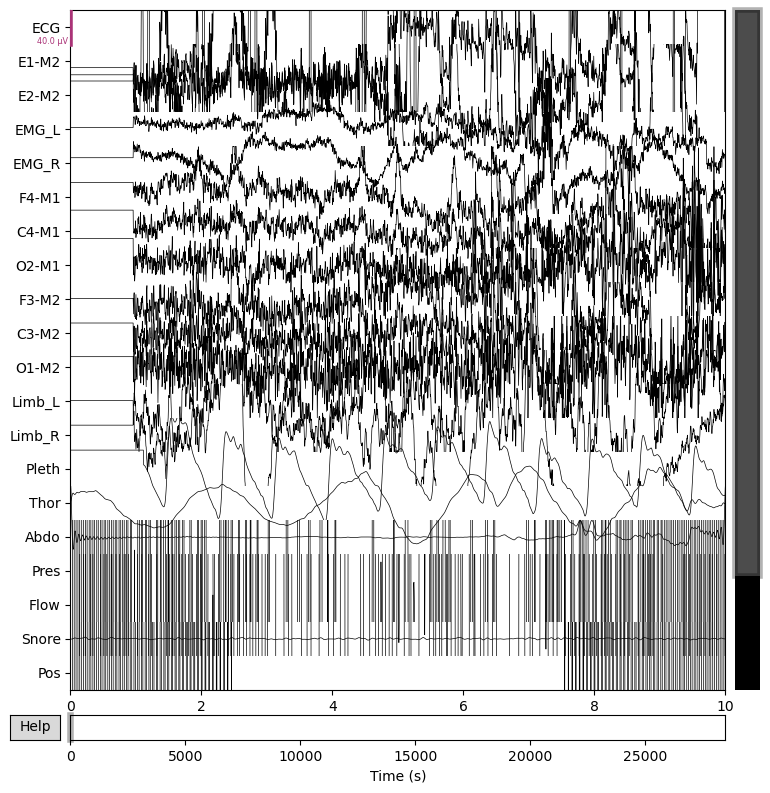

In [3]:
psg_processor.psg_plot()

### Example usage: Print file header information

In [4]:
psg_processor.print_file_info(file_path, 'file')

Field Name | Value
------------------
technician | 
recording_additional | 
patientname | chi zhang
patient_additional | 
patientcode | 
equipment | 
admincode | 
sex | 
startdate | 2024-03-07 22:05:10
birthdate | 30 dec 1899
gender | 


### Example usage: Print signal labels

In [5]:
psg_processor.print_file_info(file_path, 'label')

Signal Labels | Sampling Frequencies
------------------------------------
ECG | 256.0
E1-M2 | 256.0
E2-M2 | 256.0
EMG_L | 256.0
EMG_R | 256.0
F4-M1 | 256.0
C4-M1 | 256.0
O2-M1 | 256.0
F3-M2 | 256.0
C3-M2 | 256.0
O1-M2 | 256.0
Limb_L | 256.0
Limb_R | 256.0
Pleth | 256.0
Thor | 32.0
Abdo | 32.0
Pres | 32.0
Flow | 32.0
Snore | 32.0
Pos | 32.0
Therm | 32.0
OxStatus | 1.0
SpO2 | 1.0
HR | 1.0


### Example usage: Print signal details

In [6]:
psg_processor.print_file_info(file_path, 'signal')


Signal 1:
Field Name | Value
------------------
label | ECG
dimension | mV
sample_rate | 256.0
sample_frequency | 256.0
physical_max | -5.0
physical_min | 5.0
digital_max | 32767
digital_min | -32768
prefilter | 
transducer | G01


Signal 2:
Field Name | Value
------------------
label | E1-M2
dimension | mV
sample_rate | 256.0
sample_frequency | 256.0
physical_max | -2.0
physical_min | 2.0
digital_max | 32767
digital_min | -32768
prefilter | 
transducer | G02


Signal 3:
Field Name | Value
------------------
label | E2-M2
dimension | mV
sample_rate | 256.0
sample_frequency | 256.0
physical_max | -2.0
physical_min | 2.0
digital_max | 32767
digital_min | -32768
prefilter | 
transducer | G03


Signal 4:
Field Name | Value
------------------
label | EMG_L
dimension | mV
sample_rate | 256.0
sample_frequency | 256.0
physical_max | -2.0
physical_min | 2.0
digital_max | 32767
digital_min | -32768
prefilter | 
transducer | G04


Signal 5:
Field Name | Value
------------------
label | EMG_R
dime

### Example usage: Plot signals over time

In [14]:
start_datetime = datetime(2024, 3, 7, 22, 10, 00)  # Replace with your actual start datetime
end_datetime = datetime(2024, 3, 7, 22, 11, 00)  # Replace with your actual end datetime
data_types = ['ECG', 'Pleth']  # Replace with your actual data types

# Print the start and end timestamps of the extracted data
print(f"\033[93mStart Timestamp: {start_datetime}, End Timestamp: {end_datetime}\033[0m")

extracted_data = psg_processor.extract_segment_by_timestamp(start_datetime, end_datetime, data_types)

Start Timestamp: 2024-03-07 22:10:00, End Timestamp: 2024-03-07 22:11:00


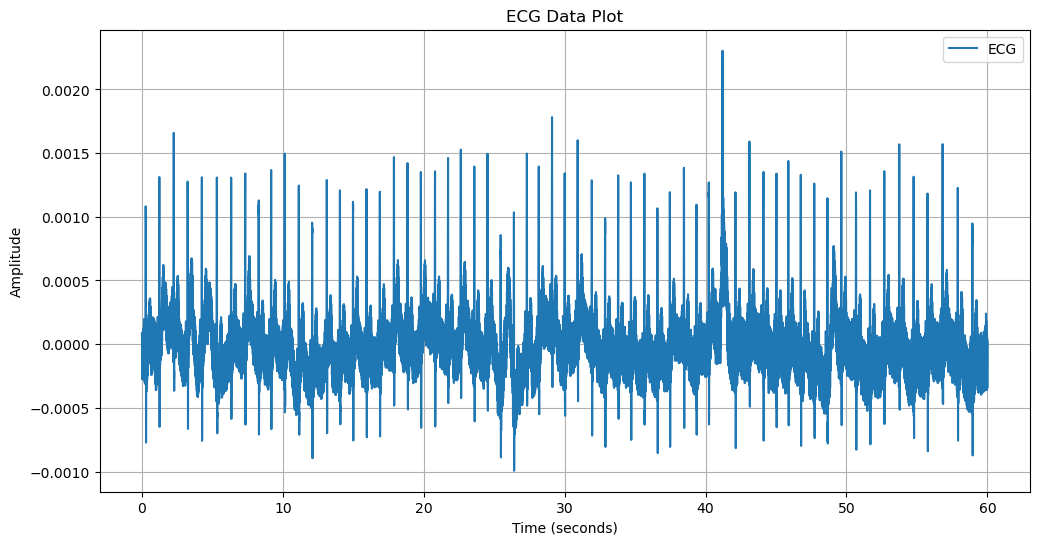

In [15]:
psg_processor.plot_data(extracted_data['ECG'],'ECG', psg_processor.sampling_rate)


### Example usage: Plot comparison between signals

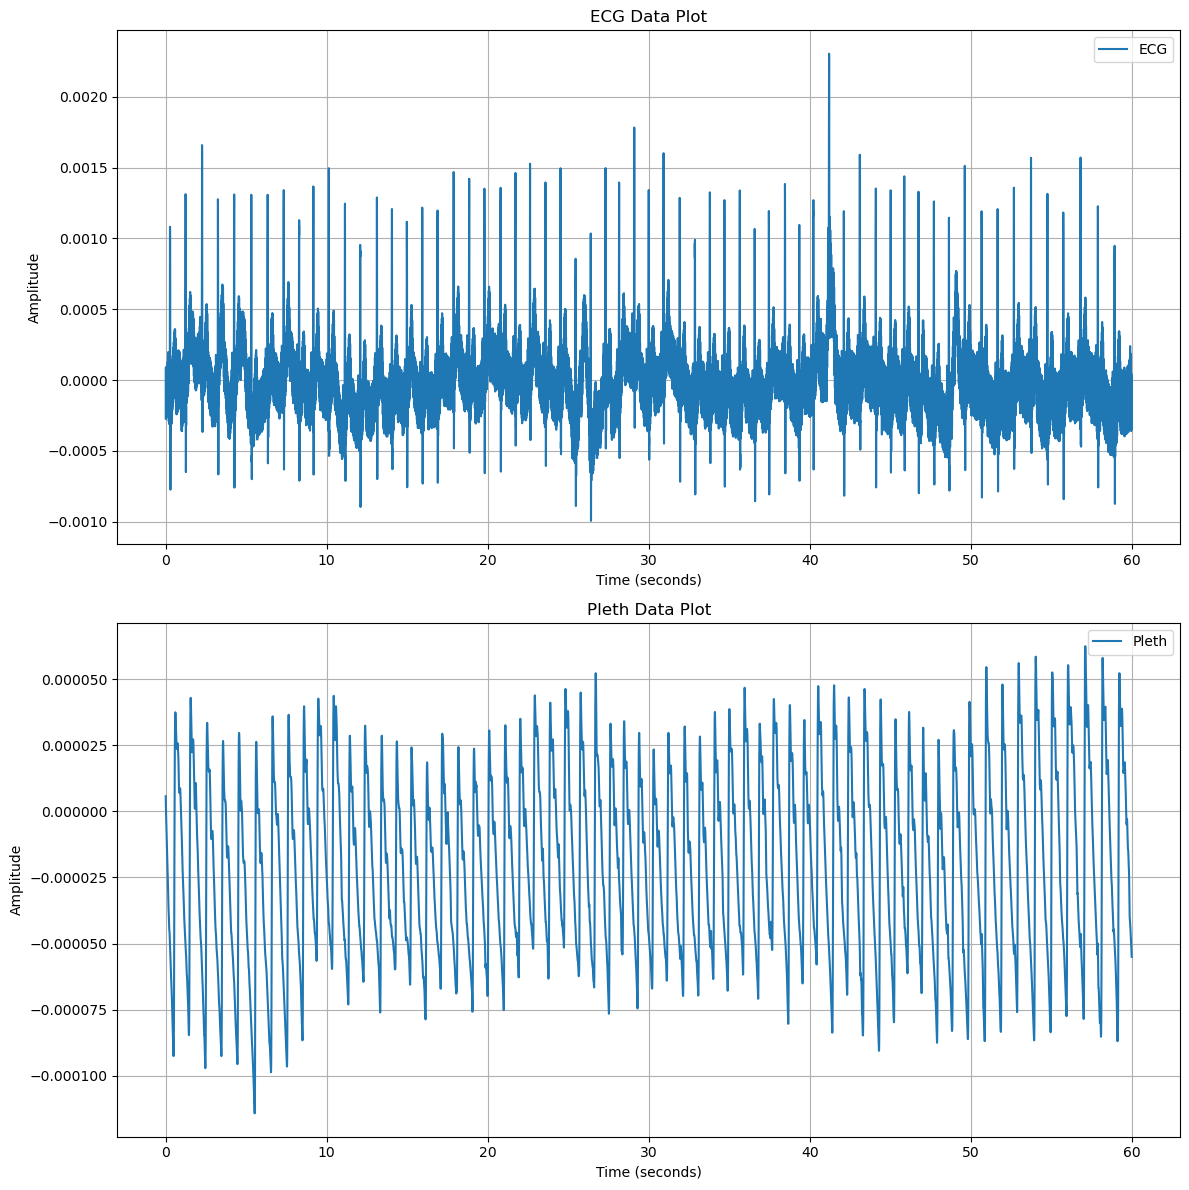

In [16]:
all_types = list(extracted_data.keys())
psg_processor.compare_plot(extracted_data, all_types, psg_processor.sampling_rate)


### Example usage: Plot ECG signal

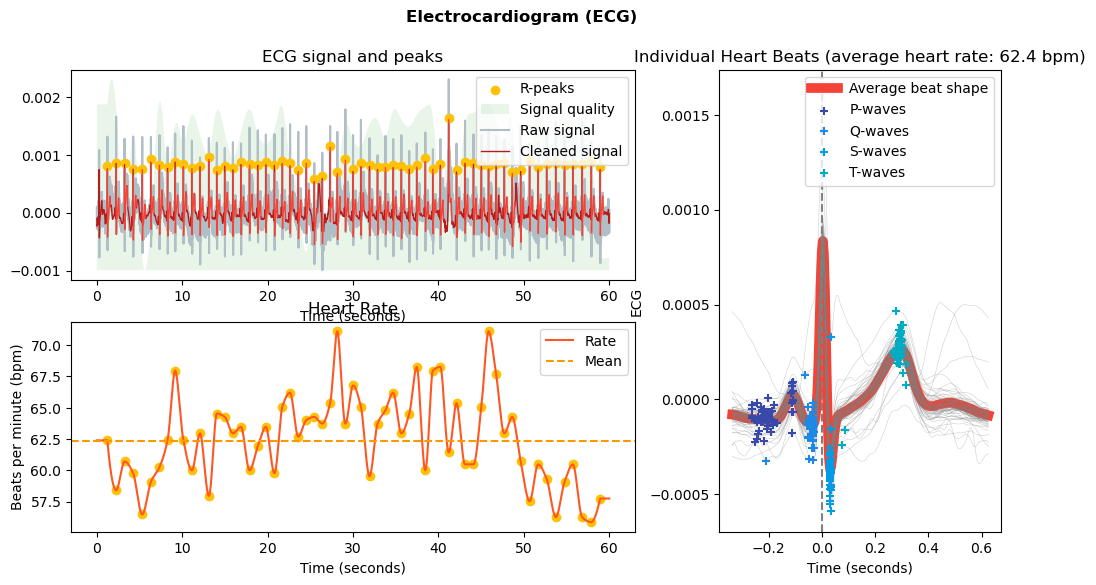

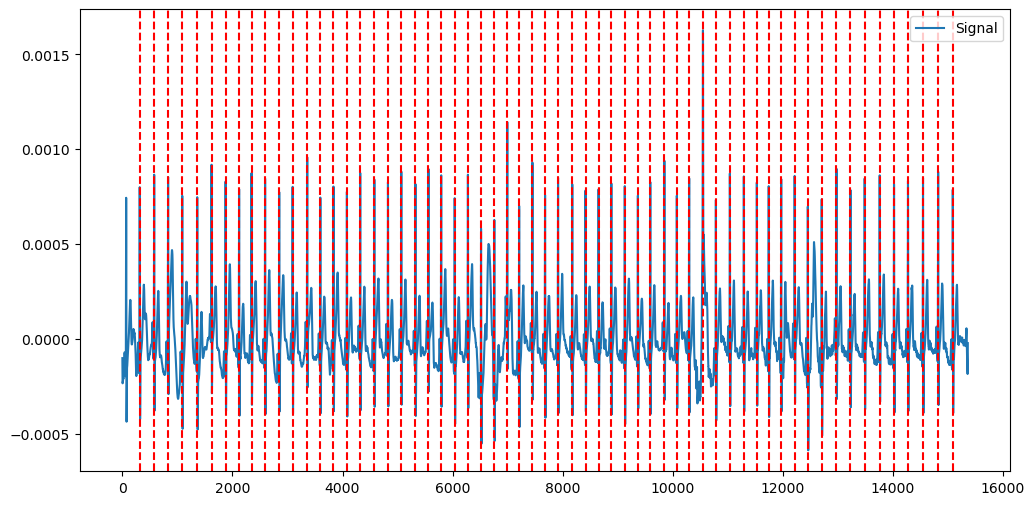

In [17]:
ecg_signals, ecg_info = psg_processor.ecg_diagram(extracted_data['ECG'])

### Example usage: Plot RSP signal

The raw signal, sampled at 256.0 Hz, linear detrending followed by a fifth order 2Hz low-pass IIR Butterworth filter; following Khoadadad et al., 2018.

The peak detection was carried out using the method described in Khoadadad et al. (2018).

The respiratory volume per time computation was carried out using the method described in Harrison et al. (2021).

|   RSP_Rate_Mean |   RSP_Rate_SD |
|----------------:|--------------:|
|         62.3876 |       3.54724 |

References
- Harrison, S. J., Bianchi, S., Heinzle, J., Stephan, K. E., Iglesias, S., & Kasper, L. (2021).
            A Hilbert-based method for processing respiratory timeseries.
            Neuroimage, 230, 117787.
- Khodadad, D., Nordebo, S., Müller, B., Waldmann, A., Yerworth, R., Becher, T., ... & Bayford, R. (2018).
            Optimized breath detection algorithm in electrical impedance tomography.
            Physiological measurement, 39(9), 094001.
- Khodadad, D., Nordebo, S., Müller, B., Waldmann, A., Yerworth, R.,

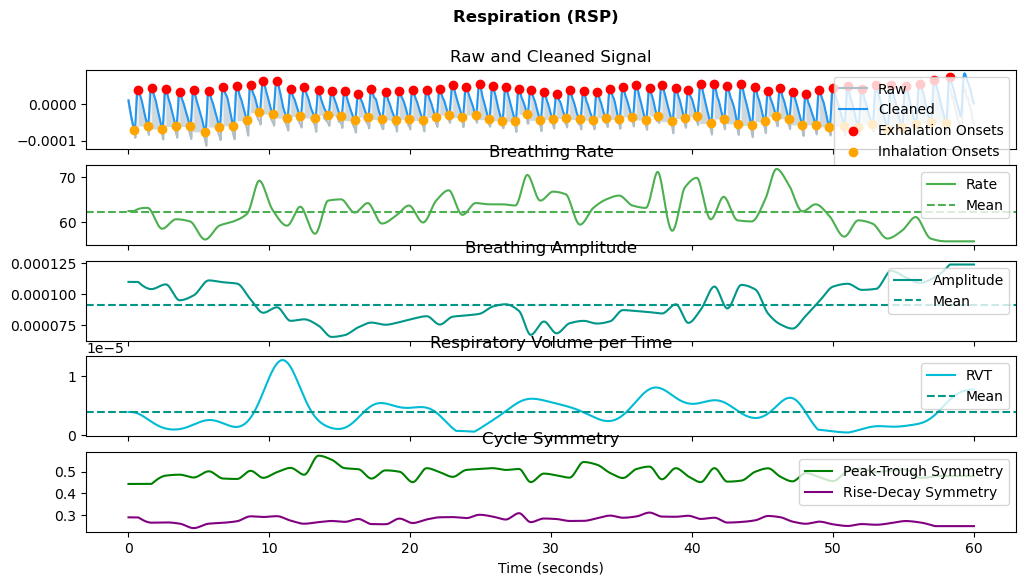

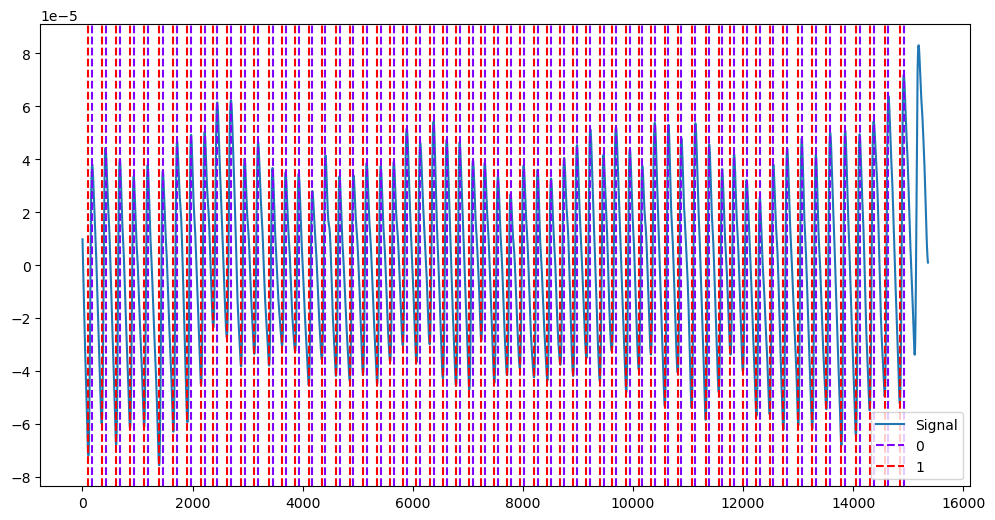

In [19]:
rsp_signals, rsp_info = psg_processor.rsp_diagram(extracted_data['Pleth'])

### Example usage: Plot multiple PSG signals

In [29]:
# data_types = ['ECG', 'Thor', 'EMG_L', 'E1-M2']
data_types = ['ECG', 'Pleth']
extracted_data = psg_processor.extract_segment_by_timestamp(start_datetime, end_datetime, data_types)

psg_processor.signals_diagram(extracted_data)


KeyError: 'Thor'